
## Instructions

Lancer le code à l'intérieur du dossier contenant les vidéos

In [81]:
import cv2
import os

# Dossier où les images extraites seront stockées
output_dir = '/frames'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)



# Parcourir toutes les vidéos de 0 à 31
for i in range(32):
    video_path = f'Shoplifting001_x264_{i}.mp4'  # Chemin de la vidéo
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"Impossible d'ouvrir la vidéo {video_path}")
        continue

    print(f"Extraction des images de {video_path}...")

    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame_count += 1
        # Redimensionner l'image
        frame_resized = cv2.resize(frame, (224, 224))  # Redimensionnement à 224x224 pixels
        # Sauvegarder l'image
        frame_filename = f'{output_dir}/video_{i}frame{frame_count:04d}.jpg'
        cv2.imwrite(frame_filename, frame_resized)

    cap.release()
    print(f"{frame_count} images extraites de {video_path}")

print("Extraction terminée pour toutes les vidéos.")

Extraction des images de /Shoplifting001_x264_0.mp4...
120 images extraites de /Shoplifting001_x264_0.mp4
Extraction des images de /Shoplifting001_x264_1.mp4...
120 images extraites de /Shoplifting001_x264_1.mp4
Extraction des images de /Shoplifting001_x264_2.mp4...
120 images extraites de /Shoplifting001_x264_2.mp4
Extraction des images de /Shoplifting001_x264_3.mp4...
120 images extraites de /Shoplifting001_x264_3.mp4
Extraction des images de /Shoplifting001_x264_4.mp4...
120 images extraites de /Shoplifting001_x264_4.mp4
Extraction des images de /Shoplifting001_x264_5.mp4...
120 images extraites de /Shoplifting001_x264_5.mp4
Extraction des images de /Shoplifting001_x264_6.mp4...
120 images extraites de /Shoplifting001_x264_6.mp4
Extraction des images de /Shoplifting001_x264_7.mp4...
120 images extraites de /Shoplifting001_x264_7.mp4
Extraction des images de /Shoplifting001_x264_8.mp4...
120 images extraites de /Shoplifting001_x264_8.mp4
Extraction des images de /Shoplifting001_x264_

In [84]:

import os
import shutil

# Chemin du dossier de base où sont stockées les images
base_path = "/frames"

suspect_folder = "/frames/1"
non_suspect_folder = "/frames/0"

# Créer les sous-dossiers s'ils n'existent pas
os.makedirs(suspect_folder, exist_ok=True)
os.makedirs(non_suspect_folder, exist_ok=True)

# Déplacer les images des vidéos suspectes (13, 14, 15) dans le dossier "1"
for video_id in [13, 14, 15]:
    for frame_id in range(1, 121):
        # Format du nom de l'image
        frame_filename = f"{base_path}/video_{video_id}frame{frame_id:04d}.jpg"
        # Vérifier si le fichier existe et le déplacer dans le dossier suspect
        if os.path.exists(frame_filename):
            shutil.move(frame_filename, f"{suspect_folder}/video_{video_id}frame{frame_id:04d}.jpg")

# Déplacer les images des vidéos non suspectes (3, 5, 11, 12, 16, 19, 22, 27) dans le dossier "0"
for video_id in [3, 5, 11, 12, 16, 19, 22, 27]:
    for frame_id in range(1, 121):
        # Format du nom de l'image
        frame_filename = f"{base_path}/video_{video_id}frame{frame_id:04d}.jpg"
        # Vérifier si le fichier existe et le déplacer dans le dossier non suspect
        if os.path.exists(frame_filename):
            shutil.move(frame_filename, f"{non_suspect_folder}/video_{video_id}frame{frame_id:04d}.jpg")

In [85]:
dir_path = '/frames/1'
IMAGE_DIMS = (128, 128, 3)

X = []
Y = []

for i in os.listdir(dir_path):
        image = cv2.imread(os.path.join(dir_path, i))
        resized = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))

        X.append(resized)
        Y.append(1)

dir_path = '/frames/0'
for i in os.listdir(dir_path):
        image = cv2.imread(os.path.join(dir_path, i))
        resized = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))

        X.append(resized)
        Y.append(0)


In [86]:
print(X[1])

[[[0 0 1]
  [0 0 0]
  [0 1 0]
  ...
  [2 0 0]
  [2 0 0]
  [2 0 0]]

 [[0 0 1]
  [0 0 0]
  [0 0 0]
  ...
  [2 0 0]
  [2 0 0]
  [2 0 0]]

 [[2 1 0]
  [2 1 0]
  [0 0 0]
  ...
  [2 0 0]
  [2 0 0]
  [2 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [2 0 0]
  [2 1 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [2 1 0]
  [2 0 0]
  [2 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [2 0 0]
  [2 0 0]
  [2 0 1]]]


In [87]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

In [88]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [90]:
print(y_train[2])

1


In [91]:
print(X_train.shape)
print(X_test.shape)

(1056, 128, 128, 3)
(264, 128, 128, 3)


In [ ]:
!pip install keras

In [92]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models


In [93]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_DIMS)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [96]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │       3,211,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,268,298 (12.47 MB)

 Trainable params: 3,268,298 (12.47 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=4,
                    validation_data=(X_test, y_test))

Epoch 1/4
33/33 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5821 - loss: 40.9128 - val_accuracy: 0.9394 - val_loss: 0.2047
Epoch 2/4
33/33 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9588 - loss: 0.1387 - val_accuracy: 0.9773 - val_loss: 0.0843
Epoch 3/4
33/33 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9888 - loss: 0.0281 - val_accuracy: 1.0000 - val_loss: 0.0075
Epoch 4/4
33/33 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9899 - loss: 0.0257 - val_accuracy: 0.9886 - val_loss: 0.0197


9/9 - 3s - 278ms/step - accuracy: 0.9886 - loss: 0.0197


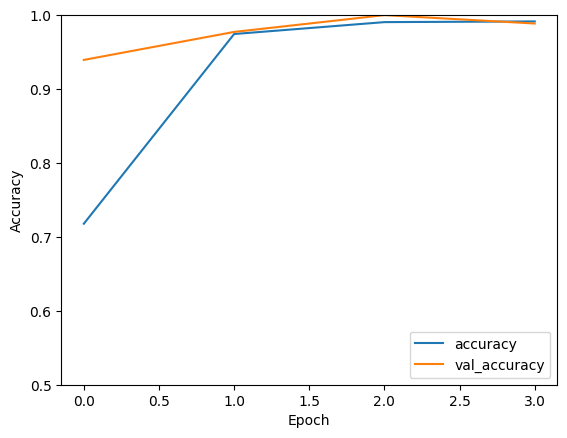

In [98]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)